In [102]:
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [154]:
# Holders for streamlit input
DEFAULT_METRICS = ["Weight", "Reps"]
selected_metric = "1rm"
# selected_e_names = ["Bench Press (Barbell)", "Overhead Press (Barbell)"]
selected_e_names = ["Squat (Barbell)", "Front Squat (Barbell)", "Deadlift (Barbell)"]


def one_rep_max(weight: pd.Series, reps: pd.Series):
    return weight / ( 1.0278 - 0.0278 * reps.clip(0, 10) )


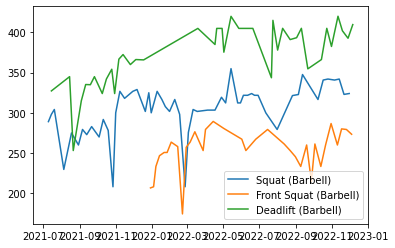

In [156]:
# Read the table (auto cleans the nan)
df = pd.read_csv("strong.csv", na_filter=False)
df["Date"] = pd.to_datetime(df["Date"])
df["1rm"] = one_rep_max(df["Weight"], df["Reps"])

selected_exercise_patern = '|'.join(map(re.escape, selected_e_names))
selected_e_df = df[df["Exercise Name"].str.fullmatch(
    selected_exercise_patern)]

# Full rows, selected for maximum selected_metric
idx = selected_e_df.groupby(["Date", "Exercise Name"])[selected_metric].idxmax()
df_maxed = selected_e_df.loc[idx].reset_index(drop=True)
# display(maxed)

fig, ax = plt.subplots()

# Plot one by one
for ex in selected_e_names:
    cat = df_maxed.loc[df_maxed["Exercise Name"] == ex]
    ax.plot(cat["Date"], cat[selected_metric])
ax.legend(selected_e_names)
# plt.show()


# selected_e_pivot_df
